## Alzheimer's Disease Prediction - Machine Learning Analysis

**Author:** Deniz Lal Ersoy  
**Date:** 02.12.2024  

This notebook explores the **Alzheimer's Disease Dataset** using **exploratory data analysis (EDA)** and **machine learning models** to predict Alzheimer's diagnosis.

### Dataset Citation
**Rabie El Kharoua.** (2024). *Alzheimer's Disease Dataset.*  
Kaggle. DOI: [10.34740/KAGGLE/DSV/8668279](https://www.kaggle.com/dsv/8668279)

**Dataset Source:** [Alzheimer's Disease Dataset on Kaggle](https://www.kaggle.com/dsv/8668279)

In [40]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Suppress FutureWarnings
warnings.filterwarnings("ignore")

print("Import succesful.")


Import succesful.


## STEP 1: Data Overview, Cleaning, Exploration (EDA)

In [60]:
# Load (change the path to where the data is saved.)
file_path = "path/to/data/alzheimers_disease_data.csv"
df = pd.read_csv(file_path)

df.info()

# Check for missing values
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values[missing_values > 0]

# Count patients vs controls
diagnosis_counts = df["Diagnosis"].value_counts()
print("\nNumber of Patients vs Controls:")
print(f"Controls (Diagnosis = 0): {diagnosis_counts[0]}")
print(f"Patients (Diagnosis = 1): {diagnosis_counts[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Dataset includes 2149 individuals: 760 are diagnosed with Alzheimer's while 1389 are not. There are no missing values. 

In [46]:
# Summary statistics of numerical features
df.describe().round(2)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.00,2149.00,2149.00,2149.0,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,...,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00
mean,5825.00,74.91,0.51,0.7,1.29,27.66,0.29,10.04,4.92,4.99,...,5.08,0.21,0.16,4.98,0.21,0.16,0.15,0.16,0.30,0.35
std,620.51,8.99,0.50,1.0,0.90,7.22,0.45,5.76,2.86,2.91,...,2.89,0.41,0.36,2.95,0.40,0.37,0.36,0.37,0.46,0.48
min,4751.00,60.00,0.00,0.0,0.00,15.01,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5288.00,67.00,0.00,0.0,1.00,21.61,0.00,5.14,2.57,2.46,...,2.57,0.00,0.00,2.34,0.00,0.00,0.00,0.00,0.00,0.00
50%,5825.00,75.00,1.00,0.0,1.00,27.82,0.00,9.93,4.77,5.08,...,5.09,0.00,0.00,5.04,0.00,0.00,0.00,0.00,0.00,0.00
75%,6362.00,83.00,1.00,1.0,2.00,33.87,1.00,15.16,7.43,7.56,...,7.55,0.00,0.00,7.58,0.00,0.00,0.00,0.00,1.00,1.00
max,6899.00,90.00,1.00,3.0,3.00,39.99,1.00,19.99,9.99,10.00,...,10.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00


In [59]:
# Create an interactive bar plot to display the number of patients and controls in the dataset 
diagnosis_counts = df['Diagnosis'].value_counts().reset_index()

fig = px.bar(diagnosis_counts,
             x='Diagnosis', y='count',  
             text='count', labels={'Diagnosis': 'Diagnosis', 'count': 'Count'},
             color='Diagnosis', color_continuous_scale='viridis')

fig.update_traces(textposition='outside')
fig.update_layout(title="Alzheimer's Diagnosis Distribution",
                  xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['No', 'Yes']),
                  yaxis_title="Count")

fig.show()

The number of patients (N = 760) are considerably lower than the number of controls (N = 1389). The minority class (Alzheimer's) represents only ~35% of the dataset.
We will oversample the patient population (at the end of EDA; for model training) to overcome this imbalance. For now, we proceed with exploring the data at hand. 



### Feature Correlation Matrix

In this step, we compute the correlation between numerical features in the dataset. This helps us understand which factors might be influencing Alzheimer's diagnosis the most.


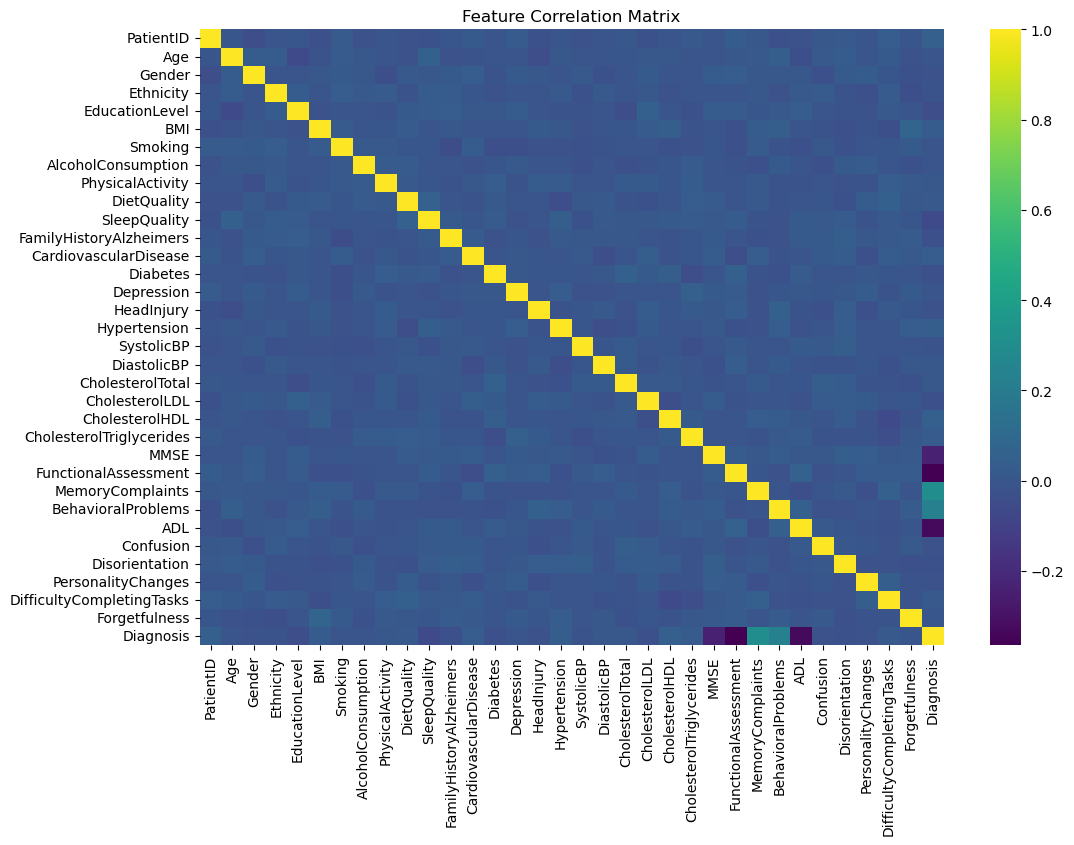

In [15]:
# Drop non-numeric columns before computing correlation
numeric_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
# heatmap
sns.heatmap(corr_matrix, cmap='viridis', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

- **MMSE:** Mini-Mental State Examination score (0 to 30).  
  - Lower scores indicate **cognitive impairment**.  
- **FunctionalAssessment:** Functional assessment score (0 to 10).  
  - Lower scores indicate **greater impairment**.  
- **MemoryComplaints:** Indicates whether the patient reports memory complaints.  
  - `0 = No`, `1 = Yes`.  
- **BehavioralProblems:** Presence of behavioral problems.  
  - `0 = No`, `1 = Yes`.  
- **ADL (Activities of Daily Living):** Measures ability to perform daily tasks (0 to 10).  
  - Lower scores indicate **greater impairment**.


### Categorical Feature Distributions by Diagnosis

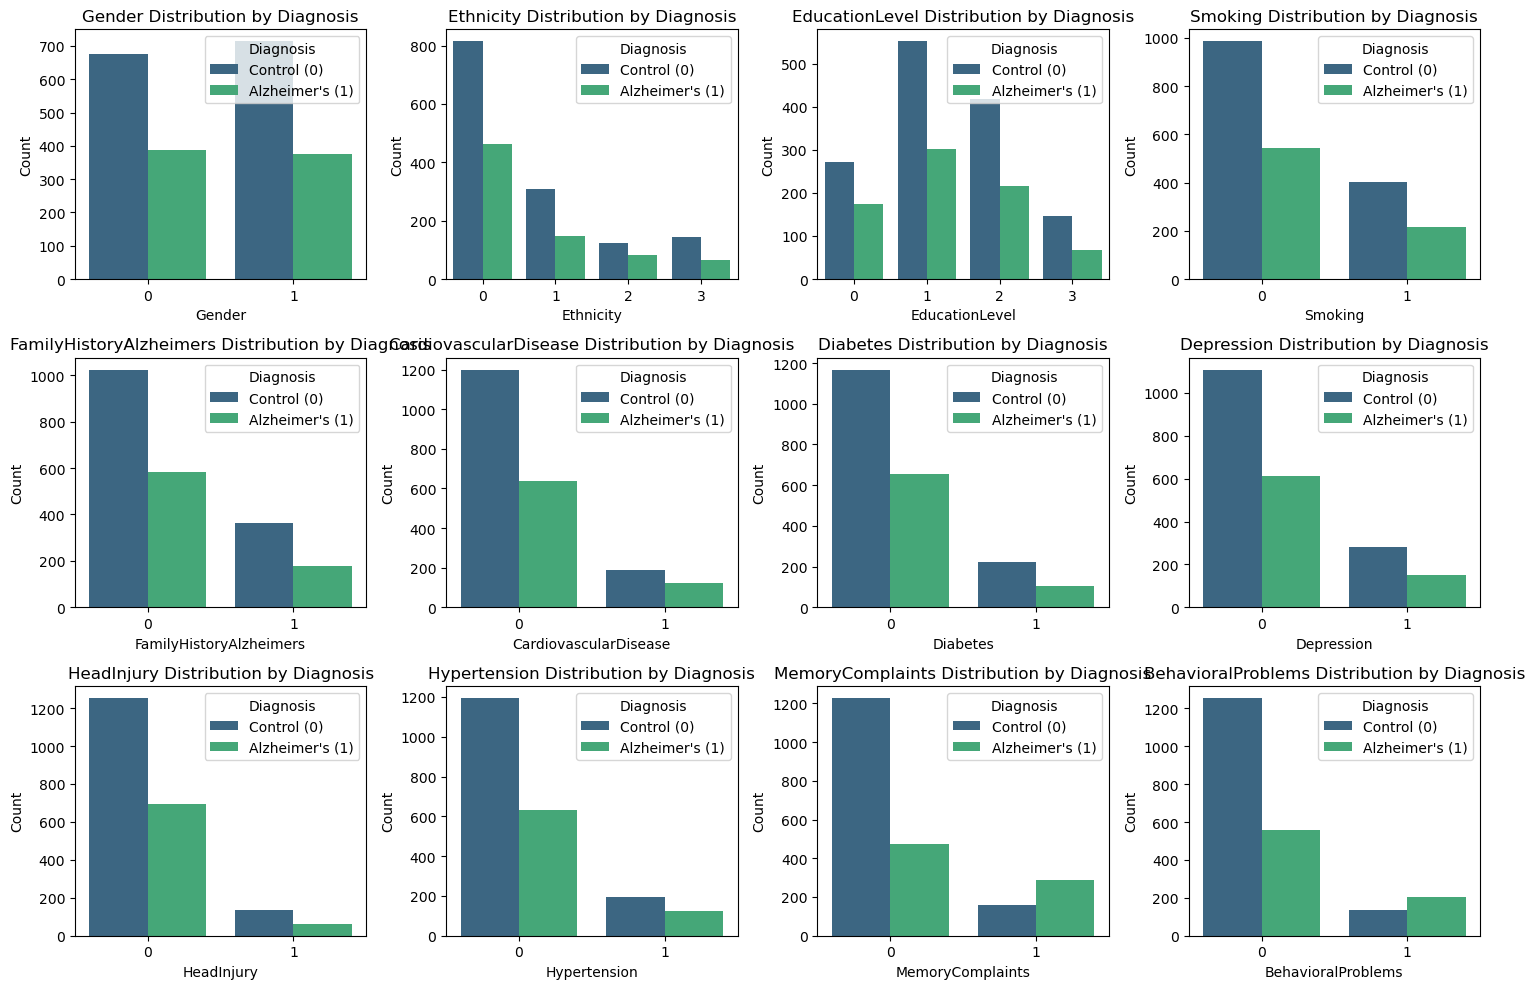

In [62]:
# specify the categorical columns 
cat_columns = ["Gender", "Ethnicity", "EducationLevel", "Smoking", "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes", "Depression", 
        "HeadInjury", "Hypertension","MemoryComplaints","BehavioralProblems"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(3, 4, i) 
    sns.countplot(data=df, x=col, hue="Diagnosis", palette="viridis")
    plt.title(f"{col} Distribution by Diagnosis")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Diagnosis", labels=["Control (0)", "Alzheimer's (1)"])

plt.tight_layout()
plt.show()


This visualization explores **categorical features** in the dataset, showing their distribution among **Alzheimer's patients (1) and controls (0)**.

### Distribution of Numerical Features by Diagnosis

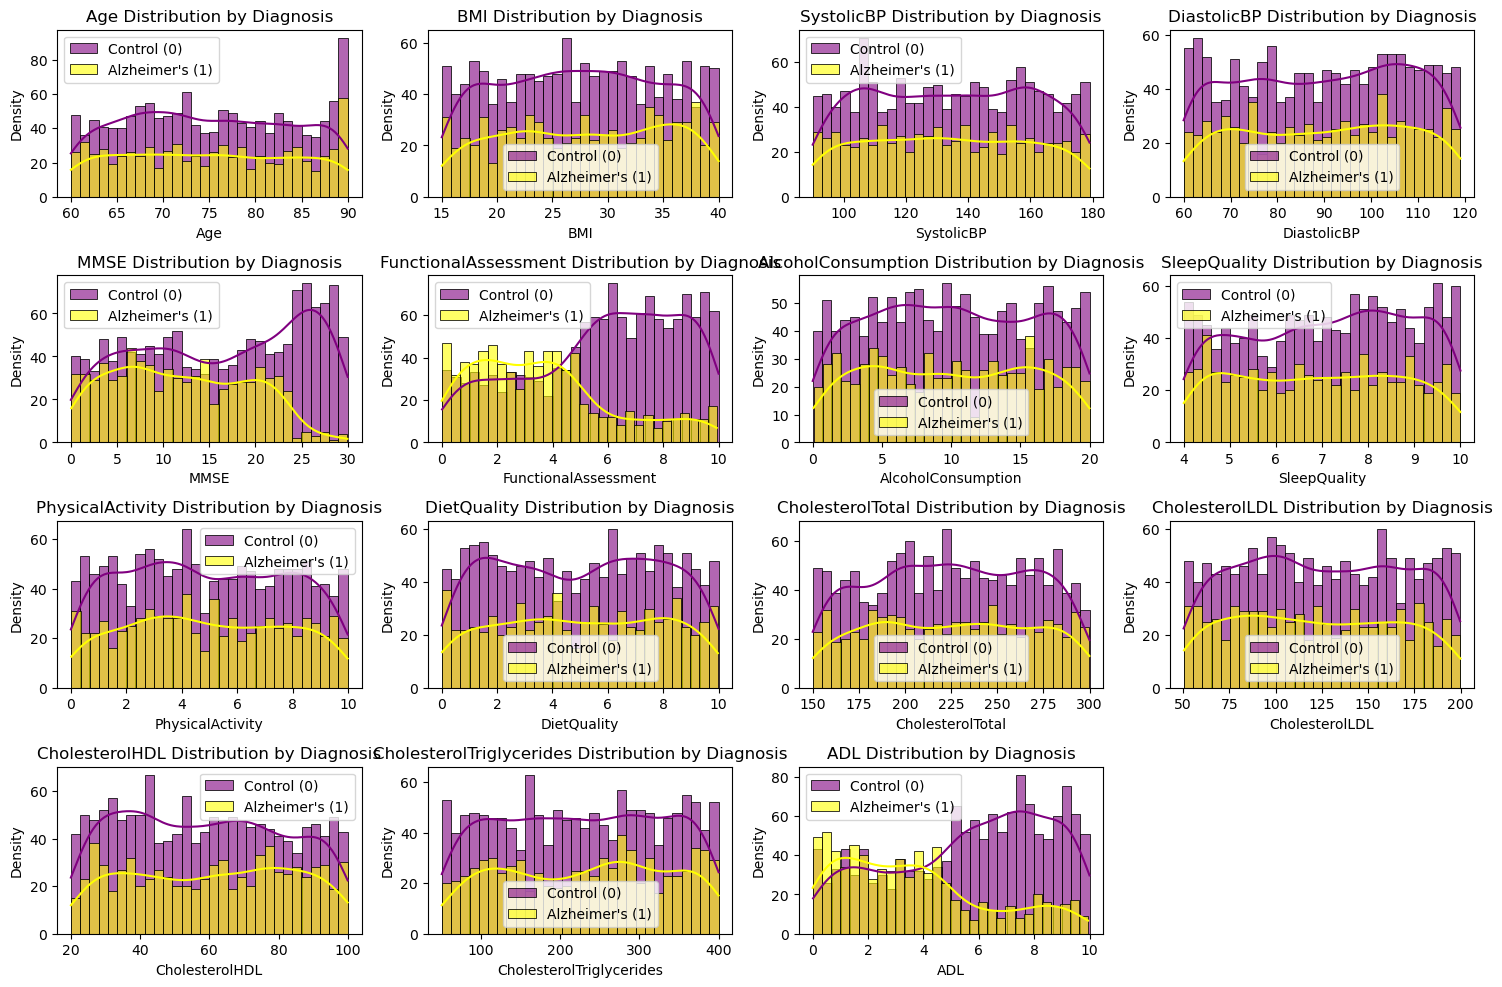

In [17]:
plt.figure(figsize=(15, 12))

# specify the numerical columns 
num_columns = ["Age", "BMI", "SystolicBP", "DiastolicBP", "MMSE", "FunctionalAssessment", 
               "AlcoholConsumption", "SleepQuality", "PhysicalActivity", "DietQuality", 
               "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", 
               "ADL"]

for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 4, i)
    
    # Plot both control and diagnosis groups
    sns.histplot(df[df["Diagnosis"] == 0][col], bins=30, kde=True, color="purple", label="Control (0)", alpha=0.6)
    sns.histplot(df[df["Diagnosis"] == 1][col], bins=30, kde=True, color="yellow", label="Alzheimer's (1)", alpha=0.6)
    
    plt.title(f"{col} Distribution by Diagnosis")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

Each subplot above represents a **numerical feature’s distribution**, where **Purple = Control (0)**, **Yellow = Alzheimer’s (1)**. **Density curves (KDE)** visualize the probability distribution. Differences between the two groups indicate potential risk factors. As we can see, the results align with the ones from correlation matrix (above).

### Symptom Distribution by Diagnosis

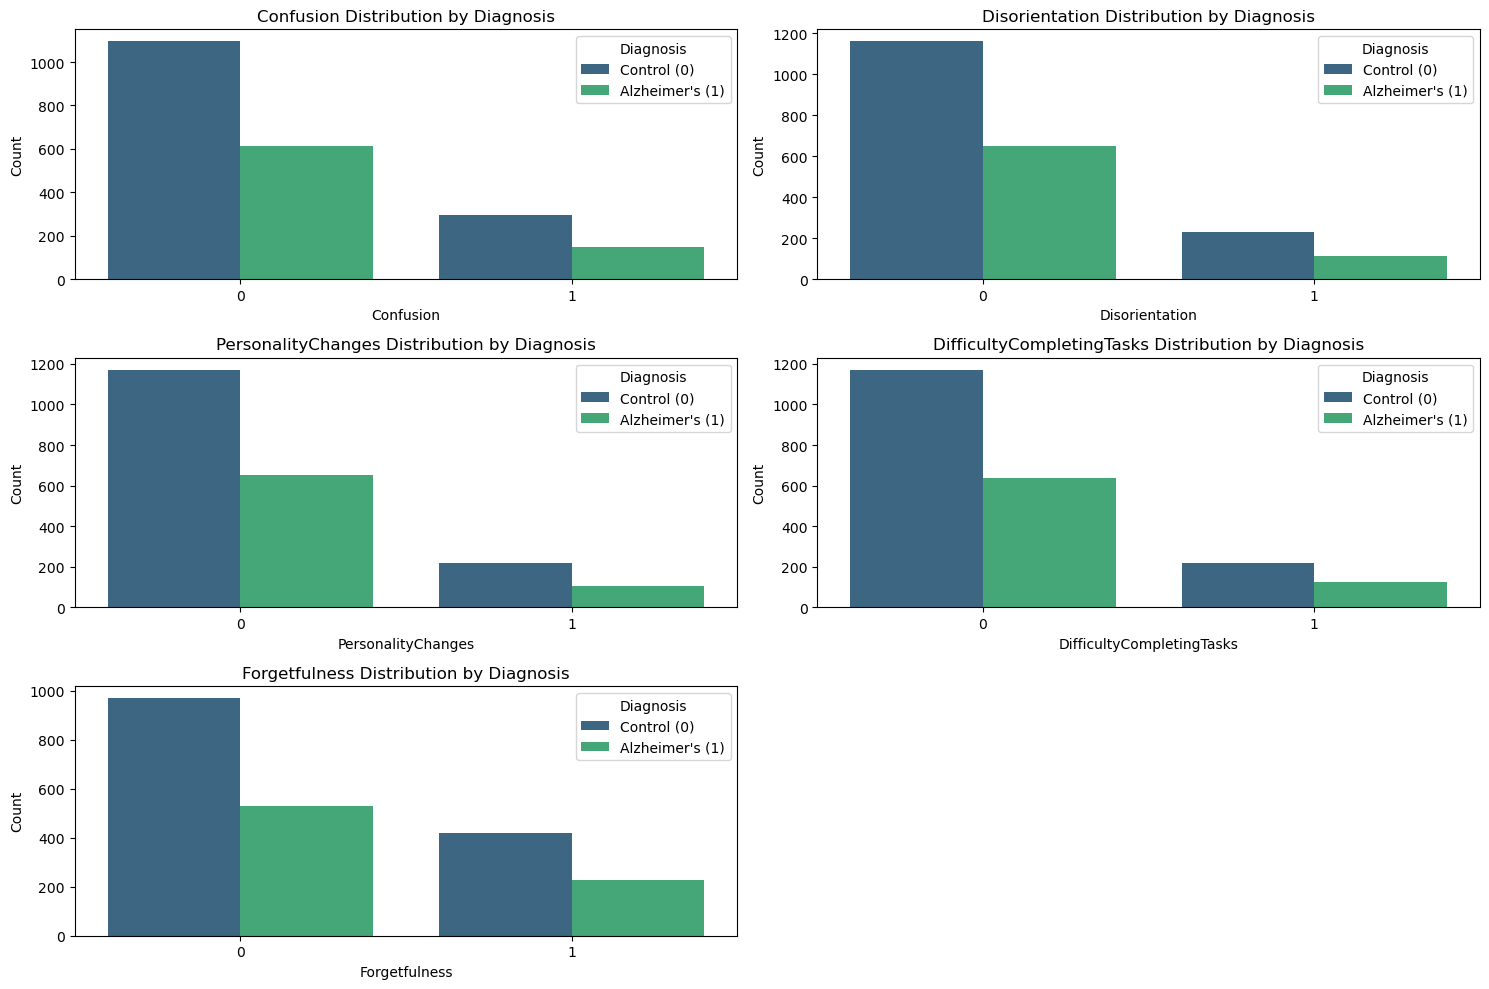

In [18]:
# Symptom columns
symptom_columns = ["Confusion", "Disorientation", "PersonalityChanges", 
                   "DifficultyCompletingTasks", "Forgetfulness"]

plt.figure(figsize=(15, 10))

# Plot each symptom separately
for i, col in enumerate(symptom_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue="Diagnosis", palette="viridis")
    plt.title(f"{col} Distribution by Diagnosis")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Diagnosis", labels=["Control (0)", "Alzheimer's (1)"])

plt.tight_layout()
plt.show()


## STEP 2: Preparing the Data for Modelling 

In [63]:
# We had checked for missing values already. We can skip that step.

# Convert binary categorical features (0 = No, 1 = Yes or 0 = Male, 1 = Female)
binary_cols = ["Gender", "Smoking", "FamilyHistoryAlzheimers", "CardiovascularDisease",
               "Diabetes", "Depression", "HeadInjury", "Hypertension",
               "Confusion", "Disorientation", "PersonalityChanges",
               "DifficultyCompletingTasks", "Forgetfulness"]

# Ensure they are integers (some might be float)
df[binary_cols] = df[binary_cols].astype(int)

# One-hot encoding for categorical variables with more than 2 categories. This line will create different columns for each ethnicity and education level (e.g., Ethnicity_1, EducationLevel_3)
df = pd.get_dummies(df, columns=["Ethnicity", "EducationLevel"], drop_first=True)

In [64]:
# Feature Scaling: Since we have mixed scales (e.g., Age (60-90) vs. MMSE (0-30) vs. Cholesterol (150-300)), we standardize numerical variables.

# Select numerical features to scale
num_cols = ["Age", "BMI", "SystolicBP", "DiastolicBP", "MMSE", "FunctionalAssessment", 
            "AlcoholConsumption", "SleepQuality", "PhysicalActivity", "DietQuality",
            "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", 
            "ADL"]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### Splitting data into training and test sets

In [65]:
# Define features and target
X = df.drop(columns=["Diagnosis", "PatientID", "DoctorInCharge"])  
y = df["Diagnosis"]  # Target 

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

print(f"Training Set: X_train -> {X_train.shape}, y_train -> {y_train.shape}")
print(f"Test Set: X_test -> {X_test.shape}, y_test -> {y_test.shape}")
print("\nFeature Details:")
print(f"Total Features Used: {X_train.shape[1]}")
print(f"Number of Training Samples: {X_train.shape[0]}")
print(f"Number of Test Samples: {X_test.shape[0]}")

# Check class distribution in training and test sets
print("\nClass Distribution in Training Set:")
print(y_train.value_counts())

print("\nClass Distribution in Test Set:")
print(y_test.value_counts())

Training Set: X_train -> (1719, 36), y_train -> (1719,)
Test Set: X_test -> (430, 36), y_test -> (430,)

Feature Details:
Total Features Used: 36
Number of Training Samples: 1719
Number of Test Samples: 430

Class Distribution in Training Set:
Diagnosis
0    1111
1     608
Name: count, dtype: int64

Class Distribution in Test Set:
Diagnosis
0    278
1    152
Name: count, dtype: int64


### Oversampling with SMOTE 

Our dataset is **imbalanced** (as discussed above), meaning we have fewer Alzheimer's patients compared to controls. To ensure our models learn effectively, we use **SMOTE (Synthetic Minority Over-sampling Technique)** to **balance ONLY the training data**. SMOTE generates new synthetic samples for the minority class by interpolating between existing data points.

In real-world applications, we train on existing data and evaluate on unseen data. However, when a dataset is (highly) imbalanced, the model may fail to learn from the minority class. To prevent bias, we use techniques like SMOTE to ensure the model is exposed to sufficient examples of both classes during training. The test set remains untouched to simulate real-world predictions.

In [66]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print new class distribution
print("\nNew Training Set Class Distribution:")
print(y_train_resampled.value_counts())

# Display shapes of resampled data
X_train_resampled.shape, y_train_resampled.shape



New Training Set Class Distribution:
Diagnosis
0    1111
1    1111
Name: count, dtype: int64


((2222, 36), (2222,))

# STEP 3: Model Training and Performance Evaluation

In this step, we train and evaluate multiple classification models to predict Alzheimer's disease.  
- **Logistic Regression** → A simple, interpretable model for classification.
- **Random Forest** → An ensemble method that improves performance through multiple decision trees.
- **Support Vector Machine (SVM)** → Captures complex decision boundaries for classification.
- **XGBoost** → A powerful boosting algorithm that enhances learning from mistakes.
- **K-Nearest Neighbors (KNN)** → A non-parametric method that classifies based on the closest neighbors.


Training Logistic Regression...
Logistic Regression Accuracy: 0.7977
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       278
           1       0.68      0.82      0.74       152

    accuracy                           0.80       430
   macro avg       0.78      0.80      0.79       430
weighted avg       0.81      0.80      0.80       430


Training Random Forest...
Random Forest Accuracy: 0.9256
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       278
           1       0.93      0.86      0.89       152

    accuracy                           0.93       430
   macro avg       0.93      0.91      0.92       430
weighted avg       0.93      0.93      0.92       430


Training SVM...
SVM Accuracy: 0.8233
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       278
           1       0.76      0.74      0.75       152

    accuracy    

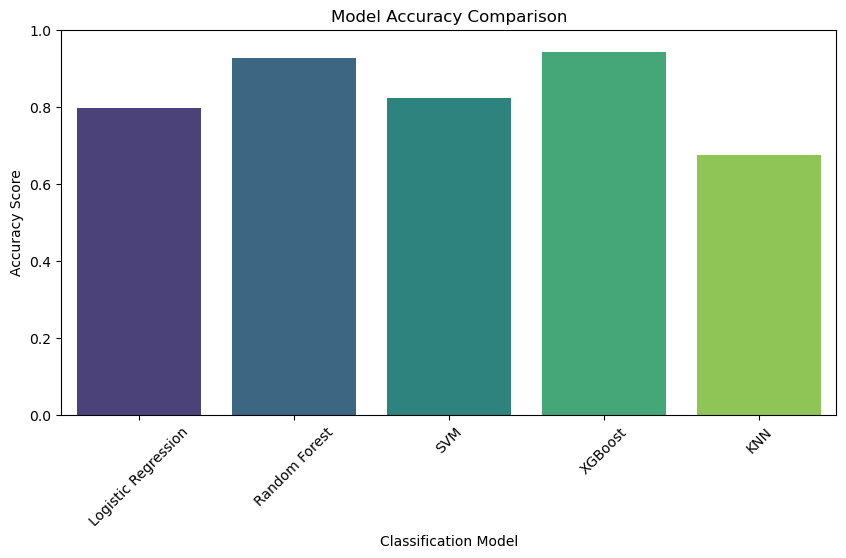


Model Comparison Results:

                 Model  Accuracy
0  Logistic Regression  0.797674
1        Random Forest  0.925581
2                  SVM  0.823256
3              XGBoost  0.941860
4                  KNN  0.674419


In [69]:
# Define models with default hyperparameters
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)  # Train on balanced data
    y_pred = model.predict(X_test)  # Predict on test set

    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Classification Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Set y-axis between 0 and 1 for clarity
plt.xticks(rotation=45)
plt.show()

# Display
print("\nModel Comparison Results:\n")
print(results_df)
